In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

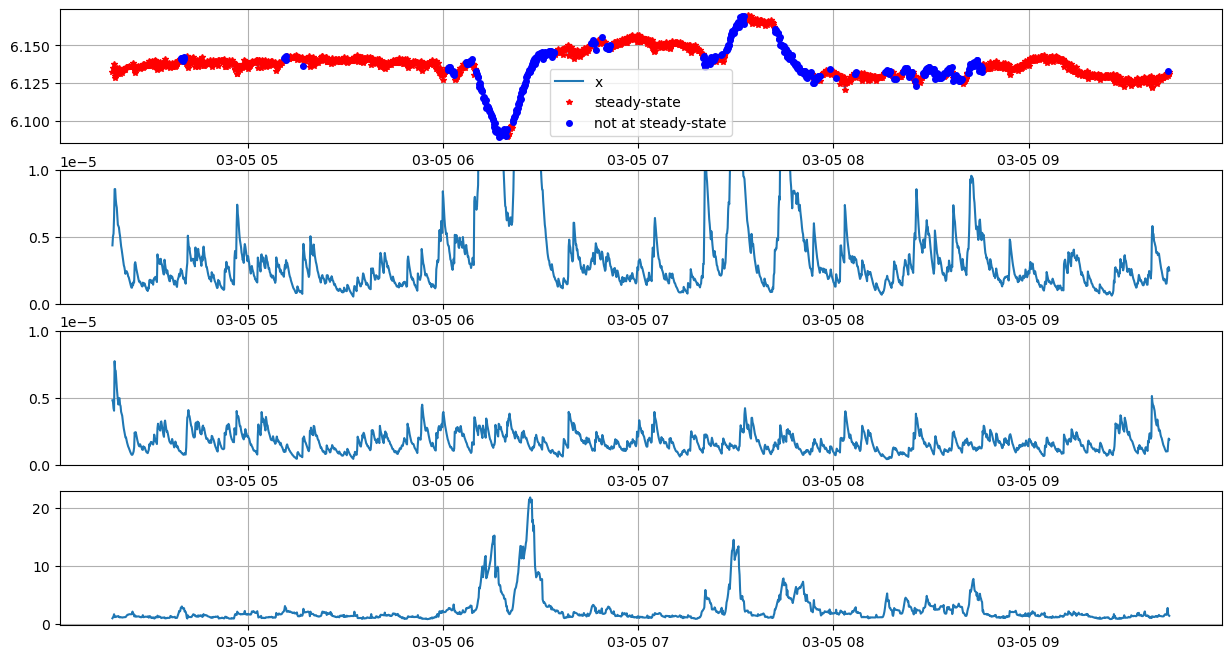

R = 2.3715370273232828


In [7]:
data = pd.read_csv('Igor2.csv', index_col=1, parse_dates=True)
data_PT = data[['PV-FT-15']]

indexes_v3 = [i for i in range(1500, 3500,1)]
data_v3 = data_PT.iloc[indexes_v3]

l1 = 0.2
l2 = 0.1
l3 = 0.1

x_st = data_v3.iloc[:50, 0].mean()
xf_st = data_v3.iloc[:50, 0].mean()
vf_st= data_v3.iloc[:50, 0].var()
df_st = 2*data_v3.iloc[:50, 0].var()
r_list = []
vf_list = []
df_list = []
xf_list = []

for i in range(51, 2000):
    xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
    vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
    df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
    r = ((2-l1)*vf)/df
    vf_list.append(vf)
    df_list.append(df)
    r_list.append(r)
    xf_list.append(xf)
    x_st = data_v3.iloc[i,0]
    xf_st = xf
    vf_st = vf
    df_st = df
    
rr = pd.DataFrame(data = r_list , index=data_v3.iloc[51:2000].index, columns = ['R'])
vff = pd.DataFrame(data = vf_list , index=data_v3.iloc[51:2000].index, columns = ['R'])
dff = pd.DataFrame(data = df_list , index=data_v3.iloc[51:2000].index, columns = ['R'])
xff = pd.DataFrame(data = xf_list , index=data_v3.iloc[51:2000].index, columns = ['R'])

rr['stationary'] = np.where(rr['R']>2.3715370273232828, 0, 1)

data_graph = pd.concat([data_v3, rr], axis=1)

plt.figure(figsize=(15,8))
plt.subplot(4, 1, 1)
plt.plot(data_graph.iloc[51:2000].index, data_graph.iloc[51:2000, 0], label='x')
plt.plot(data_graph[data_graph['stationary']==1].index, data_graph[data_graph['stationary']==1]['PV-FT-15'], 'r*', markersize=4, label='steady-state')
plt.plot(data_graph[data_graph['stationary']==0].index, data_graph[data_graph['stationary']==0]['PV-FT-15'], 'bo',  markersize=4, label='not at steady-state')

plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(vff.index,((2-l1)/2)*vff)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(dff.index,dff/2)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(rr.index,rr['R'])
plt.grid(True)

plt.show()
a=sum(r_list)
b=len(r_list)
c=a/b
print("R = " + str(c))

In [3]:
[0.27435721, 0.15527401, 0.11697731]

[0.27435721, 0.15527401, 0.11697731]

In [4]:
0.27435721, 0.15527401, 0.11697731

(0.27435721, 0.15527401, 0.11697731)

In [5]:
[0.27831324, 0.15788779, 0.11730394, 2.97817077]

[0.27831324, 0.15788779, 0.11730394, 2.97817077]

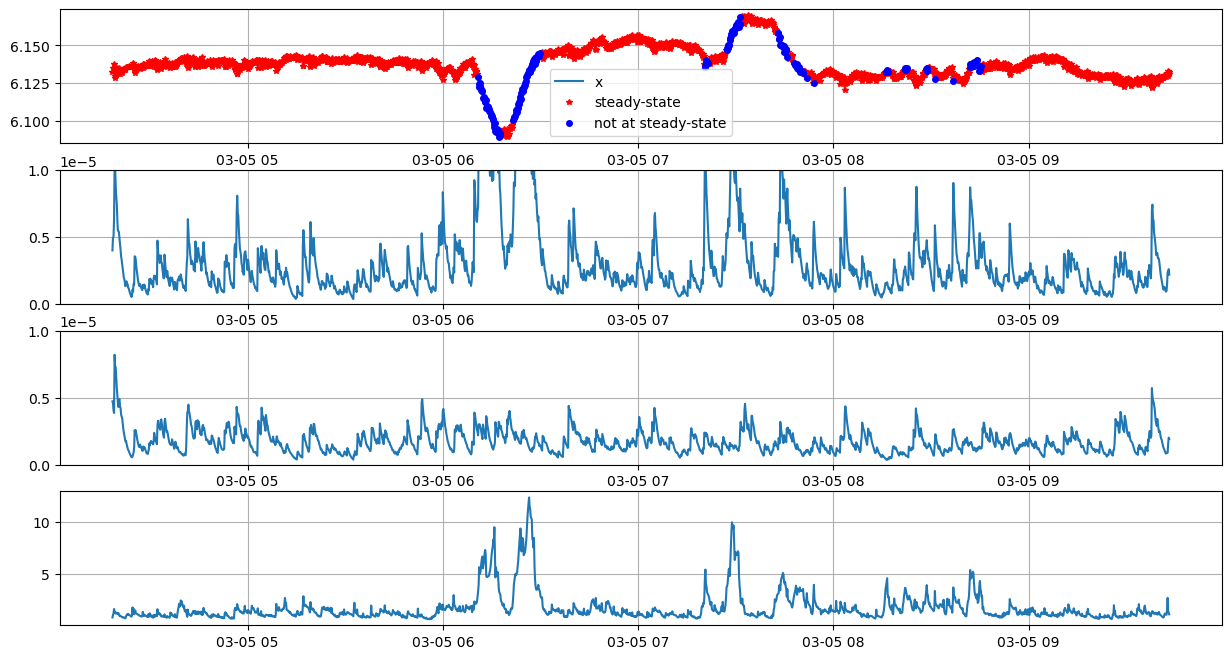

In [11]:
l1 = 0.27435721
l2 = 0.15527401
l3 = 0.11697731

x_st = data_v3.iloc[:50, 0].mean()
xf_st = data_v3.iloc[:50, 0].mean()
vf_st= data_v3.iloc[:50, 0].var()
df_st = 2*data_v3.iloc[:50, 0].var()
r_list = []
vf_list = []
df_list = []
xf_list = []

for i in range(51, 2000):
    xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
    vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
    df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
    r = ((2-l1)*vf)/df
    vf_list.append(vf)
    df_list.append(df)
    r_list.append(r)
    xf_list.append(xf)
    x_st = data_v3.iloc[i,0]
    xf_st = xf
    vf_st = vf
    df_st = df
    
rr = pd.DataFrame(data = r_list , index=data_v3.iloc[51:2000].index, columns = ['R'])
vff = pd.DataFrame(data = vf_list , index=data_v3.iloc[51:2000].index, columns = ['R'])
dff = pd.DataFrame(data = df_list , index=data_v3.iloc[51:2000].index, columns = ['R'])
xff = pd.DataFrame(data = xf_list , index=data_v3.iloc[51:2000].index, columns = ['R'])

rr['stationary'] = np.where(rr['R']>3, 0, 1)

data_graph = pd.concat([data_v3, rr], axis=1)

plt.figure(figsize=(15,8))
plt.subplot(4, 1, 1)
plt.plot(data_graph.iloc[51:2000].index, data_graph.iloc[51:2000, 0], label='x')
plt.plot(data_graph[data_graph['stationary']==1].index, data_graph[data_graph['stationary']==1]['PV-FT-15'], 'r*', markersize=4, label='steady-state')
plt.plot(data_graph[data_graph['stationary']==0].index, data_graph[data_graph['stationary']==0]['PV-FT-15'], 'bo',  markersize=4, label='not at steady-state')

plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(vff.index,((2-l1)/2)*vff)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(dff.index,dff/2)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(rr.index,rr['R'])
plt.grid(True)

plt.show()

In [9]:
ee_list = []
for i in range(51, 2000):
    ee = 1
    if i>709:
        ee = 0
    if i>764:
        ee = 1
    if i>780:
        ee = 0
    if i>839:
        ee = 1
    if i>1158:
        ee = 0
    if i>1209:
        ee = 1
    if i>1252:
        ee = 0
    if i>1335:
        ee = 1
        
    if i>1471:
        ee = 0
    if i>1487:
        ee = 1
    
    if i>1508:
        ee = 0
    if i>1521:
        ee = 1
    
    
    ee_list.append(ee)

rr['my'] = ee_list

xx = pd.concat([data_v3, rr], axis=1)
xx.head(842)

,PV-FT-15,R,stationary,my
time,,,,
2023-03-05 04:10:00,6.124399,NaN,NaN,NaN
2023-03-05 04:10:10,6.128441,NaN,NaN,NaN
2023-03-05 04:10:20,6.129994,NaN,NaN,NaN
2023-03-05 04:10:30,6.129966,NaN,NaN,NaN
2023-03-05 04:10:40,6.128155,NaN,NaN,NaN
...,...,...,...,...
2023-03-05 06:29:30,6.143209,3.577680,0.0,0.0
2023-03-05 06:29:40,6.143198,3.460901,0.0,0.0
2023-03-05 06:29:50,6.145203,3.334047,0.0,0.0


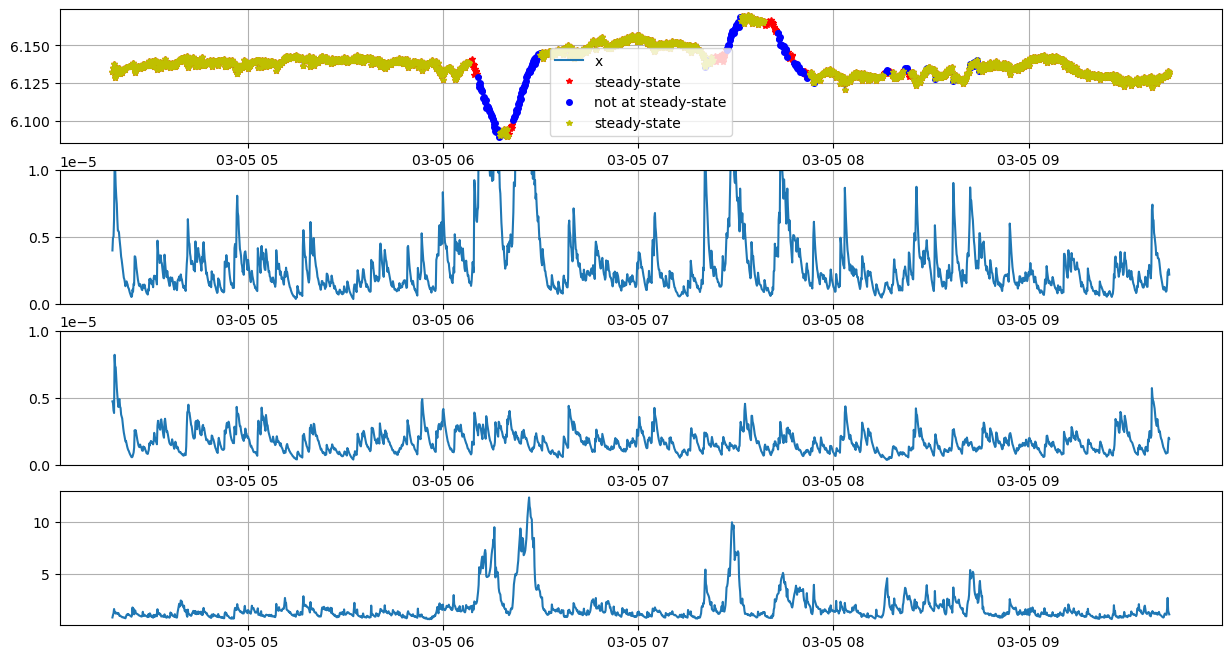

In [8]:
data_graph = pd.concat([data_v3, rr], axis=1)

plt.figure(figsize=(15,8))
plt.subplot(4, 1, 1)
plt.plot(data_graph.iloc[51:2000].index, data_graph.iloc[51:2000, 0], label='x')
plt.plot(data_graph[data_graph['stationary']==1].index, data_graph[data_graph['stationary']==1]['PV-FT-15'], 'r*', markersize=4, label='steady-state')
plt.plot(data_graph[data_graph['stationary']==0].index, data_graph[data_graph['stationary']==0]['PV-FT-15'], 'bo',  markersize=4, label='not at steady-state')
plt.plot(data_graph[data_graph['my']==1].index, data_graph[data_graph['my']==1]['PV-FT-15'], 'y*', markersize=4, label='steady-state')

plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(vff.index,((2-l1)/2)*vff)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(dff.index,dff/2)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(rr.index,rr['R'])
plt.grid(True)

plt.show()

In [9]:
table = xx.iloc[51:]

In [10]:
table

,PV-FT-15,R,stationary,my
time,,,,
2023-03-05 04:18:30,6.132578,0.845627,1.0,1.0
2023-03-05 04:18:40,6.135236,1.078828,1.0,1.0
2023-03-05 04:18:50,6.135240,1.237033,1.0,1.0
2023-03-05 04:19:00,6.137426,1.651804,1.0,1.0
2023-03-05 04:19:10,6.128370,1.275545,1.0,1.0
...,...,...,...,...
2023-03-05 09:42:30,6.131800,1.677498,1.0,1.0
2023-03-05 09:42:40,6.133103,2.718097,1.0,1.0
2023-03-05 09:42:50,6.129421,1.496358,1.0,1.0


In [11]:
from sklearn.metrics import f1_score

In [12]:
y_pred = table['stationary'].values
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [13]:
y_true = table['my'].values
y_true

array([1., 1., 1., ..., 1., 1., 1.])

In [14]:
f1_score(y_true, y_pred, average='binary')

0.9574095682613769

In [15]:
rr

,R,stationary,my
time,,,
2023-03-05 04:18:30,0.845627,1,1
2023-03-05 04:18:40,1.078828,1,1
2023-03-05 04:18:50,1.237033,1,1
2023-03-05 04:19:00,1.651804,1,1
2023-03-05 04:19:10,1.275545,1,1
...,...,...,...
2023-03-05 09:42:30,1.677498,1,1
2023-03-05 09:42:40,2.718097,1,1
2023-03-05 09:42:50,1.496358,1,1


In [16]:
def search_lyambda_2(x):
    l1 = x[0]
    l2 = x[1]
    l3 = x[2]

    x_st = data_v3.iloc[:50, 0].mean()
    xf_st = data_v3.iloc[:50, 0].mean()
    vf_st= data_v3.iloc[:50, 0].var()
    df_st = 2*data_v3.iloc[:50, 0].var()
    r_list = []


    for i in range(51, 2000):
        xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
        vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
        df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
        r = ((2-l1)*vf)/df
        r_list.append(r)
        x_st = data_v3.iloc[i,0]
        xf_st = xf
        vf_st = vf
        df_st = df


    r_np = np.array(r_list)
    y_pred = np.where(r_np>x[3], 0, 1)
    score = f1_score(y_true, y_pred, average='binary')

    return -score


In [17]:
def search_lyambda(x):
    l1 = x[0]
    l2 = x[1]
    l3 = x[2]

    x_st = data_v3.iloc[:50, 0].mean()
    xf_st = data_v3.iloc[:50, 0].mean()
    vf_st= data_v3.iloc[:50, 0].var()
    df_st = 2*data_v3.iloc[:50, 0].var()
    r_list = []


    for i in range(51, 2000):
        xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
        vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
        df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
        r = ((2-l1)*vf)/df
        r_list.append(r)
        x_st = data_v3.iloc[i,0]
        xf_st = xf
        vf_st = vf
        df_st = df


    r_np = np.array(r_list)
    y_pred = np.where(r_np>3, 0, 1)
    score = f1_score(y_true, y_pred, average='binary')

    return -score

In [18]:
len(y_pred)

1949

In [19]:
len(r_np)

NameError: name 'r_np' is not defined

In [21]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [25]:
search_lyambda([2.713e-01 , 1.983e-01 , 1.320e-01])

-0.9578454332552694

In [23]:
from scipy.optimize import minimize

In [24]:
x0 = [0.5, 0.5, 0.5]
bnds = ((0, 1), (0, 1), (0,1))
res = minimize(search_lyambda, x0, method="Powell" )
print(res)

C:\Users\Professional\AppData\Local\Temp\ipykernel_14744\3843646263.py:17: RuntimeWarning: overflow encountered in scalar divide
  r = ((2-l1)*vf)/df
C:\Users\Professional\AppData\Local\Temp\ipykernel_14744\3843646263.py:17: RuntimeWarning: overflow encountered in scalar multiply
  r = ((2-l1)*vf)/df
C:\Users\Professional\AppData\Local\Temp\ipykernel_14744\3843646263.py:15: RuntimeWarning: overflow encountered in scalar power
  vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
C:\Users\Professional\AppData\Local\Temp\ipykernel_14744\3843646263.py:14: RuntimeWarning: overflow encountered in scalar multiply
  xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
C:\Users\Professional\AppData\Local\Temp\ipykernel_14744\3843646263.py:17: RuntimeWarning: overflow encountered in scalar divide
  r = ((2-l1)*vf)/df
C:\Users\Professional\AppData\Local\Temp\ipykernel_14744\3843646263.py:17: RuntimeWarning: overflow encountered in scalar multiply
  r = ((2-l1)*vf)/df
C:\Users\Professional\AppData\Local\Temp

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.9578454332552694
       x: [ 2.713e-01  1.983e-01  1.320e-01]
     nit: 4
   direc: [[ 0.000e+00  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00  0.000e+00]
           [-2.248e-01 -1.789e-01 -2.517e-01]]
    nfev: 264


In [ ]:
0.27435721, 0.15527401, 0.11697731

In [38]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
f1_score(y_true, y_pred, average='binary')

0.9473684210526315

In [ ]:

l1 = 0.2
l2 = 0.1
l3 = 0.1

x_st = data_v3.iloc[:50, 0].mean()
xf_st = data_v3.iloc[:50, 0].mean()
vf_st= data_v3.iloc[:50, 0].var()
df_st = 2*data_v3.iloc[:50, 0].var()
r_list = []
vf_list = []
df_list = []
xf_list = []

for i in range(51, 2000):
    xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
    vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
    df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
    r = ((2-l1)*vf)/df
    vf_list.append(vf)
    df_list.append(df)
    r_list.append(r)
    xf_list.append(xf)
    x_st = data_v3.iloc[i,0]
    xf_st = xf
    vf_st = vf
    df_st = df
    
rr = pd.DataFrame(data = r_list , index=data_v3.iloc[51:2000].index, columns = ['R'])
vff = pd.DataFrame(data = vf_list , index=data_v3.iloc[51:2000].index, columns = ['R'])
dff = pd.DataFrame(data = df_list , index=data_v3.iloc[51:2000].index, columns = ['R'])
xff = pd.DataFrame(data = xf_list , index=data_v3.iloc[51:2000].index, columns = ['R'])


In [31]:
rr_nmp = np.array(r_list)

In [32]:
rr_nmp

array([0.91044357, 1.07786254, 1.24625637, ..., 1.59398864, 1.42215417,
       1.33503257])

In [34]:
test = np.where(rr_nmp>3, 0, 1)

In [36]:
f1_score(y_true, test, average='binary')

0.9473684210526315

In [29]:
rr

[0.9104435729119381,
 1.0778625357904088,
 1.2462563713807777,
 1.611301415216232,
 1.1096907391826578,
 1.2192723906610594,
 1.1200603425880407,
 1.1675661581991519,
 1.2487517246064066,
 1.2380556596914964,
 1.227784620830409,
 1.2970624808965219,
 1.1622907948360688,
 1.0743835205142334,
 1.1313515558016476,
 1.0741537885840482,
 1.0934912661997334,
 1.074319282348255,
 1.0299522886369692,
 1.0653248127523383,
 1.0818202034029047,
 1.078337012219971,
 1.1085493743917634,
 1.111299732582362,
 1.1081269853946223,
 1.184436841665068,
 1.341102538295352,
 1.438144476776558,
 1.5311987902525048,
 1.5193097856874789,
 1.579261251189757,
 1.5964365808919057,
 1.6150956520679647,
 1.6042056745552906,
 1.6043415494438054,
 1.6068549804518582,
 1.664749852962234,
 2.0673153542988016,
 1.6380910224612002,
 1.6990696172973656,
 1.2571429454132368,
 1.2355894552601339,
 1.4096716702565135,
 1.20743278552348,
 1.1917870491422995,
 1.2061155336688152,
 1.2223590943666327,
 1.2228469708844985,
 1.2

In [ ]:
#дальше рабта с различными участками таблица сверху

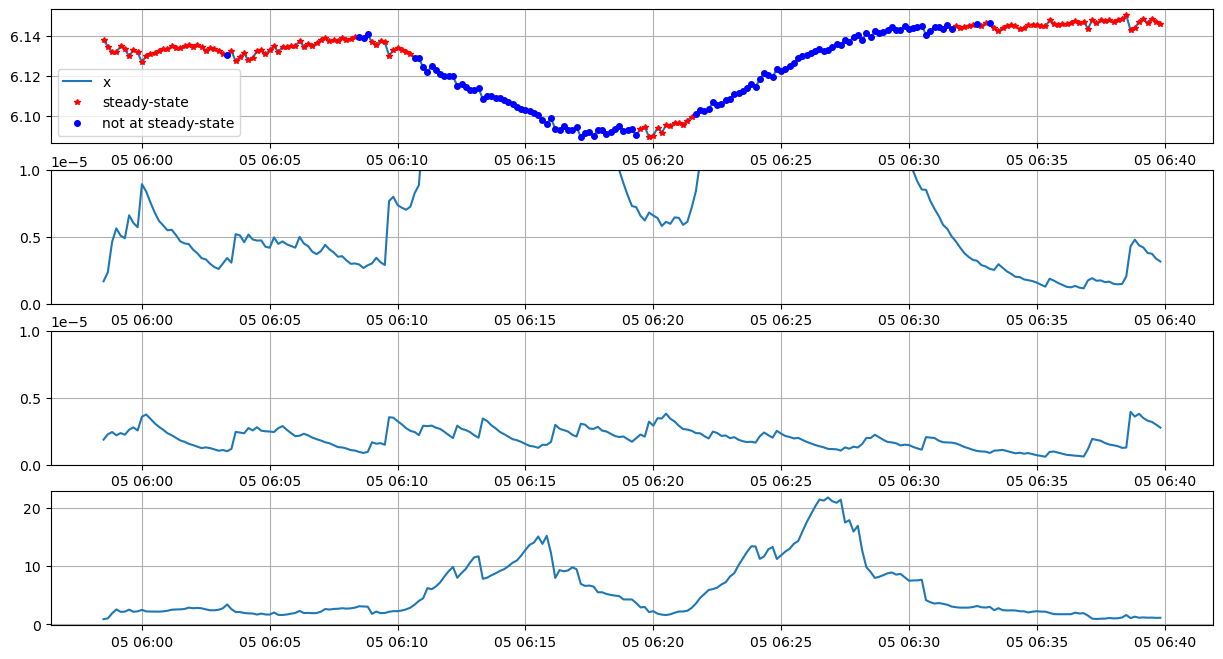

In [54]:
data = pd.read_csv('Igor2.csv', index_col=1, parse_dates=True)
data_PT = data[['PV-FT-15']]

indexes_v3 = [i for i in range(2100, 3500,1)]
data_v3 = data_PT.iloc[indexes_v3]

l1 = 0.2
l2 = 0.1
l3 = 0.1

x_st = data_v3.iloc[:50, 0].mean()
xf_st = data_v3.iloc[:50, 0].mean()
vf_st= data_v3.iloc[:50, 0].var()
df_st = 2*data_v3.iloc[:50, 0].var()
r_list = []
vf_list = []
df_list = []
xf_list = []

for i in range(51, 300):
    xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
    vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
    df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
    r = ((2-l1)*vf)/df
    vf_list.append(vf)
    df_list.append(df)
    r_list.append(r)
    xf_list.append(xf)
    x_st = data_v3.iloc[i,0]
    xf_st = xf
    vf_st = vf
    df_st = df
    
rr = pd.DataFrame(data = r_list , index=data_v3.iloc[51:300].index, columns = ['R'])
vff = pd.DataFrame(data = vf_list , index=data_v3.iloc[51:300].index, columns = ['R'])
dff = pd.DataFrame(data = df_list , index=data_v3.iloc[51:300].index, columns = ['R'])
xff = pd.DataFrame(data = xf_list , index=data_v3.iloc[51:300].index, columns = ['R'])

rr['stationary'] = np.where(rr['R']>3, 0, 1)

data_graph = pd.concat([data_v3, rr], axis=1)

plt.figure(figsize=(15,8))
plt.subplot(4, 1, 1)
plt.plot(data_graph.iloc[51:300].index, data_graph.iloc[51:300, 0], label='x')
plt.plot(data_graph[data_graph['stationary']==1].index, data_graph[data_graph['stationary']==1]['PV-FT-15'], 'r*', markersize=4, label='steady-state')
plt.plot(data_graph[data_graph['stationary']==0].index, data_graph[data_graph['stationary']==0]['PV-FT-15'], 'bo',  markersize=4, label='not at steady-state')

plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(vff.index,((2-l1)/2)*vff)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(dff.index,dff/2)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(rr.index,rr['R'])
plt.grid(True)

plt.show()

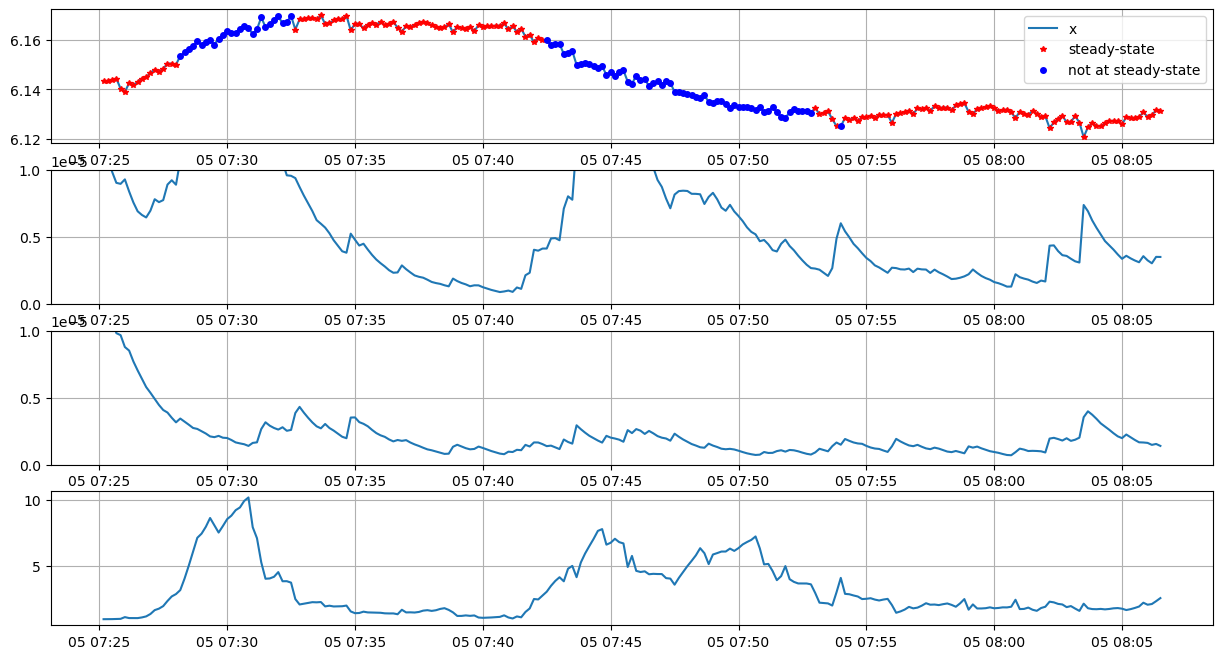

In [25]:
data = pd.read_csv('Igor2.csv', index_col=1, parse_dates=True)
data_PT = data[['PV-FT-15']]

indexes_v3 = [i for i in range(2620, 3500,1)]
data_v3 = data_PT.iloc[indexes_v3]

l1 = 0.2
l2 = 0.1
l3 = 0.1

x_st = data_v3.iloc[:50, 0].mean()
xf_st = data_v3.iloc[:50, 0].mean()
vf_st= data_v3.iloc[:50, 0].var()
df_st = 2*data_v3.iloc[:50, 0].var()
r_list = []
vf_list = []
df_list = []
xf_list = []

for i in range(51, 300):
    xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
    vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
    df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
    r = ((2-l1)*vf)/df
    vf_list.append(vf)
    df_list.append(df)
    r_list.append(r)
    xf_list.append(xf)
    x_st = data_v3.iloc[i,0]
    xf_st = xf
    vf_st = vf
    df_st = df
    
rr = pd.DataFrame(data = r_list , index=data_v3.iloc[51:300].index, columns = ['R'])
vff = pd.DataFrame(data = vf_list , index=data_v3.iloc[51:300].index, columns = ['R'])
dff = pd.DataFrame(data = df_list , index=data_v3.iloc[51:300].index, columns = ['R'])
xff = pd.DataFrame(data = xf_list , index=data_v3.iloc[51:300].index, columns = ['R'])

rr['stationary'] = np.where(rr['R']>3, 0, 1)

data_graph = pd.concat([data_v3, rr], axis=1)

plt.figure(figsize=(15,8))
plt.subplot(4, 1, 1)
plt.plot(data_graph.iloc[51:300].index, data_graph.iloc[51:300, 0], label='x')
plt.plot(data_graph[data_graph['stationary']==1].index, data_graph[data_graph['stationary']==1]['PV-FT-15'], 'r*', markersize=4, label='steady-state')
plt.plot(data_graph[data_graph['stationary']==0].index, data_graph[data_graph['stationary']==0]['PV-FT-15'], 'bo',  markersize=4, label='not at steady-state')

plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(vff.index,((2-l1)/2)*vff)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(dff.index,dff/2)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(rr.index,rr['R'])
plt.grid(True)

plt.show()

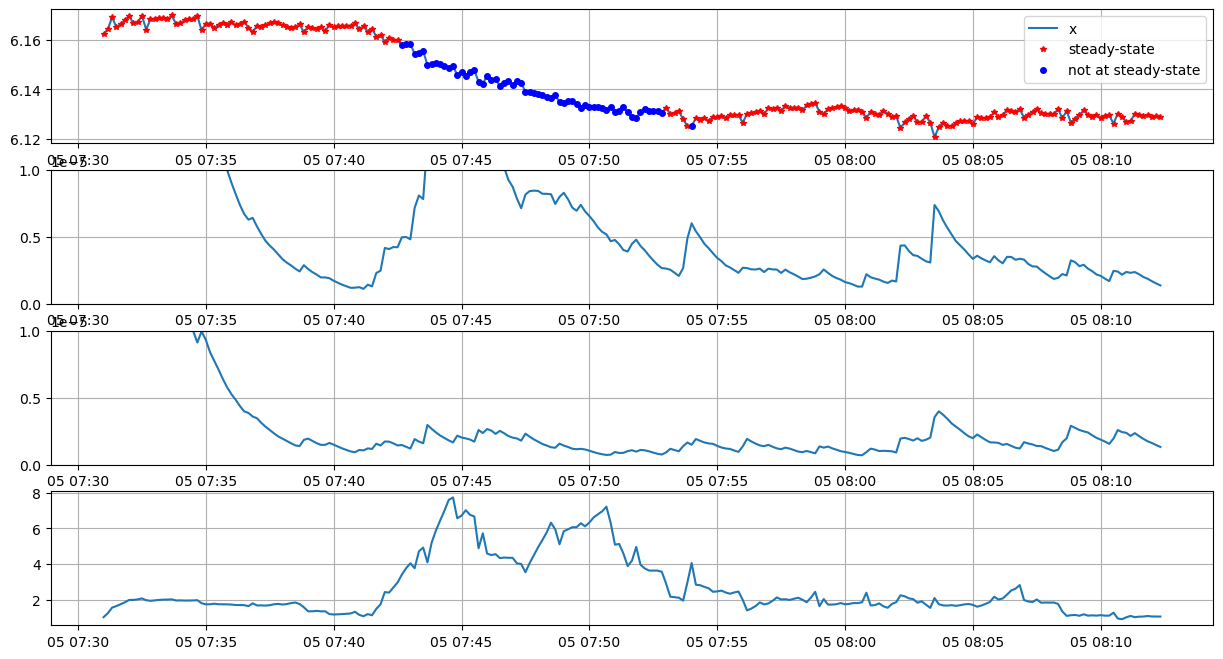

In [31]:
data = pd.read_csv('Igor2.csv', index_col=1, parse_dates=True)
data_PT = data[['PV-FT-15']]

indexes_v3 = [i for i in range(2655, 3500,1)]
data_v3 = data_PT.iloc[indexes_v3]

l1 = 0.2
l2 = 0.1
l3 = 0.1

x_st = data_v3.iloc[:50, 0].mean()
xf_st = data_v3.iloc[:50, 0].mean()
vf_st= data_v3.iloc[:50, 0].var()
df_st = 2*data_v3.iloc[:50, 0].var()
r_list = []
vf_list = []
df_list = []
xf_list = []

for i in range(51, 300):
    xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
    vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
    df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
    r = ((2-l1)*vf)/df
    vf_list.append(vf)
    df_list.append(df)
    r_list.append(r)
    xf_list.append(xf)
    x_st = data_v3.iloc[i,0]
    xf_st = xf
    vf_st = vf
    df_st = df
    
rr = pd.DataFrame(data = r_list , index=data_v3.iloc[51:300].index, columns = ['R'])
vff = pd.DataFrame(data = vf_list , index=data_v3.iloc[51:300].index, columns = ['R'])
dff = pd.DataFrame(data = df_list , index=data_v3.iloc[51:300].index, columns = ['R'])
xff = pd.DataFrame(data = xf_list , index=data_v3.iloc[51:300].index, columns = ['R'])

rr['stationary'] = np.where(rr['R']>3, 0, 1)

data_graph = pd.concat([data_v3, rr], axis=1)

plt.figure(figsize=(15,8))
plt.subplot(4, 1, 1)
plt.plot(data_graph.iloc[51:300].index, data_graph.iloc[51:300, 0], label='x')
plt.plot(data_graph[data_graph['stationary']==1].index, data_graph[data_graph['stationary']==1]['PV-FT-15'], 'r*', markersize=4, label='steady-state')
plt.plot(data_graph[data_graph['stationary']==0].index, data_graph[data_graph['stationary']==0]['PV-FT-15'], 'bo',  markersize=4, label='not at steady-state')

plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(vff.index,((2-l1)/2)*vff)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(dff.index,dff/2)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(rr.index,rr['R'])
plt.grid(True)

plt.show()

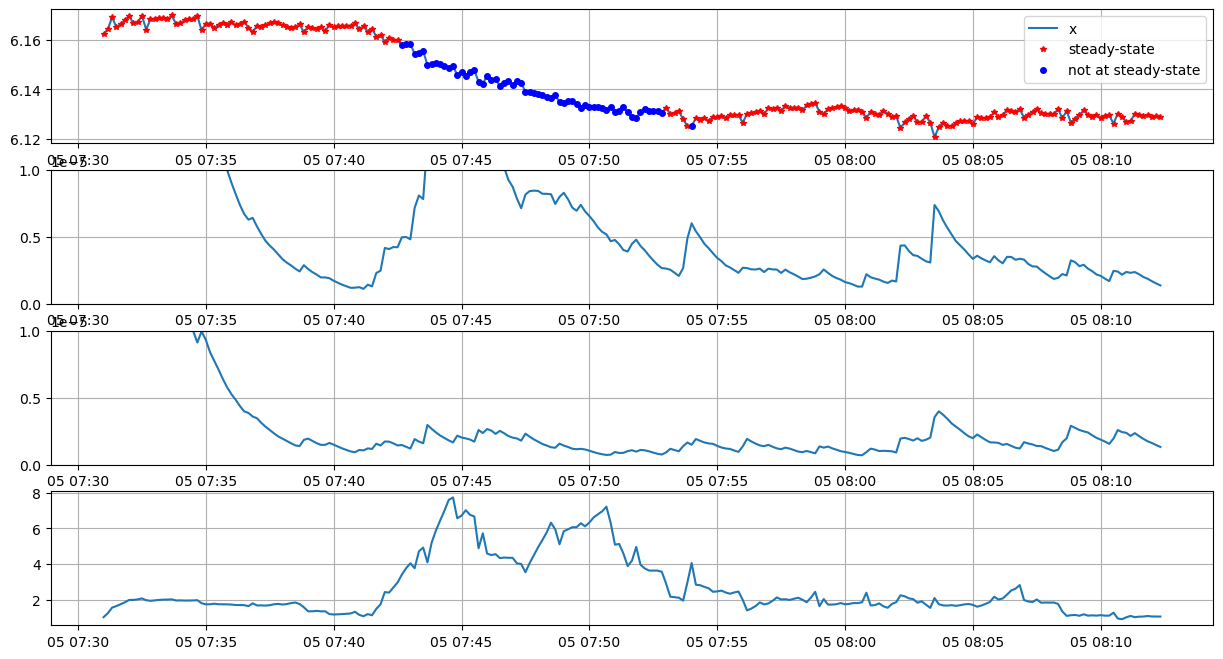

In [32]:
data = pd.read_csv('Igor2.csv', index_col=1, parse_dates=True)
data_PT = data[['PV-FT-15']]

indexes_v3 = [i for i in range(2655, 3500,1)]
data_v3 = data_PT.iloc[indexes_v3]

l1 = 0.2
l2 = 0.1
l3 = 0.1

x_st = data_v3.iloc[:50, 0].mean()
xf_st = data_v3.iloc[:50, 0].mean()
vf_st= data_v3.iloc[:50, 0].var()
df_st = 2*data_v3.iloc[:50, 0].var()
r_list = []
vf_list = []
df_list = []
xf_list = []

for i in range(51, 300):
    xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
    vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
    df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
    r = ((2-l1)*vf)/df
    vf_list.append(vf)
    df_list.append(df)
    r_list.append(r)
    xf_list.append(xf)
    x_st = data_v3.iloc[i,0]
    xf_st = xf
    vf_st = vf
    df_st = df
    
rr = pd.DataFrame(data = r_list , index=data_v3.iloc[51:300].index, columns = ['R'])
vff = pd.DataFrame(data = vf_list , index=data_v3.iloc[51:300].index, columns = ['R'])
dff = pd.DataFrame(data = df_list , index=data_v3.iloc[51:300].index, columns = ['R'])
xff = pd.DataFrame(data = xf_list , index=data_v3.iloc[51:300].index, columns = ['R'])

rr['stationary'] = np.where(rr['R']>3, 0, 1)

data_graph = pd.concat([data_v3, rr], axis=1)

plt.figure(figsize=(15,8))
plt.subplot(4, 1, 1)
plt.plot(data_graph.iloc[51:300].index, data_graph.iloc[51:300, 0], label='x')
plt.plot(data_graph[data_graph['stationary']==1].index, data_graph[data_graph['stationary']==1]['PV-FT-15'], 'r*', markersize=4, label='steady-state')
plt.plot(data_graph[data_graph['stationary']==0].index, data_graph[data_graph['stationary']==0]['PV-FT-15'], 'bo',  markersize=4, label='not at steady-state')

plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(vff.index,((2-l1)/2)*vff)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(dff.index,dff/2)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(rr.index,rr['R'])
plt.grid(True)

plt.show()

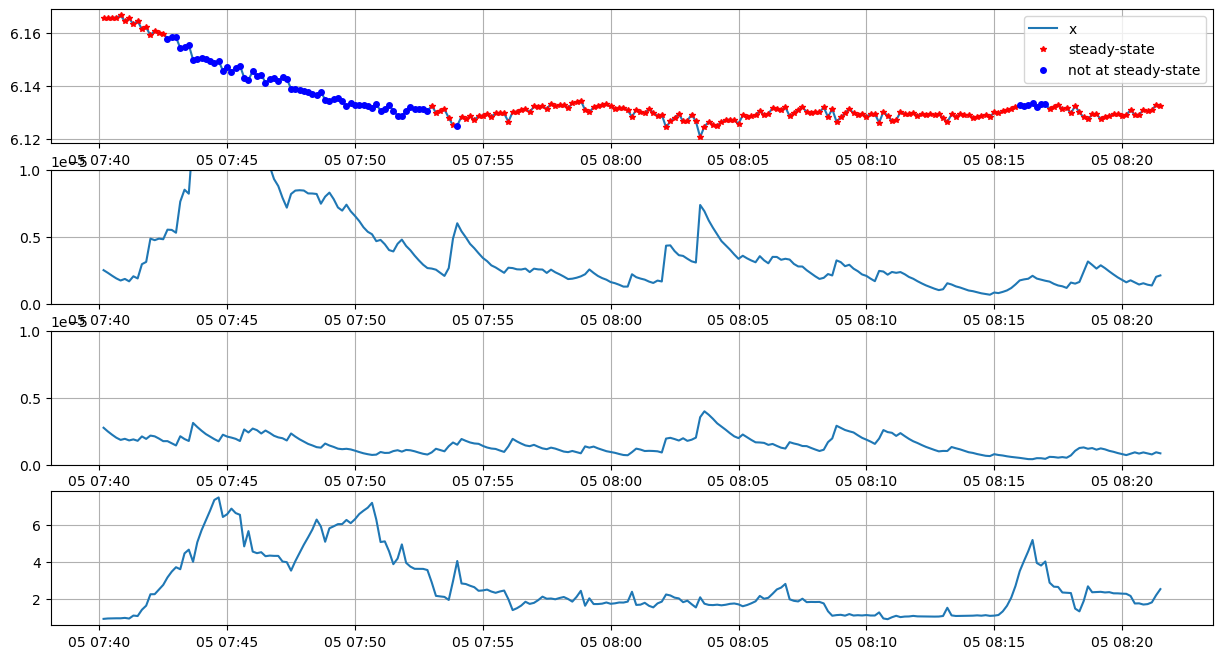

In [39]:
data = pd.read_csv('Igor2.csv', index_col=1, parse_dates=True)
data_PT = data[['PV-FT-15']]

indexes_v3 = [i for i in range(2710, 3500,1)]
data_v3 = data_PT.iloc[indexes_v3]

l1 = 0.2
l2 = 0.1
l3 = 0.1

x_st = data_v3.iloc[:50, 0].mean()
xf_st = data_v3.iloc[:50, 0].mean()
vf_st= data_v3.iloc[:50, 0].var()
df_st = 2*data_v3.iloc[:50, 0].var()
r_list = []
vf_list = []
df_list = []
xf_list = []

for i in range(51, 300):
    xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
    vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
    df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
    r = ((2-l1)*vf)/df
    vf_list.append(vf)
    df_list.append(df)
    r_list.append(r)
    xf_list.append(xf)
    x_st = data_v3.iloc[i,0]
    xf_st = xf
    vf_st = vf
    df_st = df
    
rr = pd.DataFrame(data = r_list , index=data_v3.iloc[51:300].index, columns = ['R'])
vff = pd.DataFrame(data = vf_list , index=data_v3.iloc[51:300].index, columns = ['R'])
dff = pd.DataFrame(data = df_list , index=data_v3.iloc[51:300].index, columns = ['R'])
xff = pd.DataFrame(data = xf_list , index=data_v3.iloc[51:300].index, columns = ['R'])

rr['stationary'] = np.where(rr['R']>3, 0, 1)

data_graph = pd.concat([data_v3, rr], axis=1)

plt.figure(figsize=(15,8))
plt.subplot(4, 1, 1)
plt.plot(data_graph.iloc[51:300].index, data_graph.iloc[51:300, 0], label='x')
plt.plot(data_graph[data_graph['stationary']==1].index, data_graph[data_graph['stationary']==1]['PV-FT-15'], 'r*', markersize=4, label='steady-state')
plt.plot(data_graph[data_graph['stationary']==0].index, data_graph[data_graph['stationary']==0]['PV-FT-15'], 'bo',  markersize=4, label='not at steady-state')

plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(vff.index,((2-l1)/2)*vff)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(dff.index,dff/2)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(rr.index,rr['R'])
plt.grid(True)

plt.show()

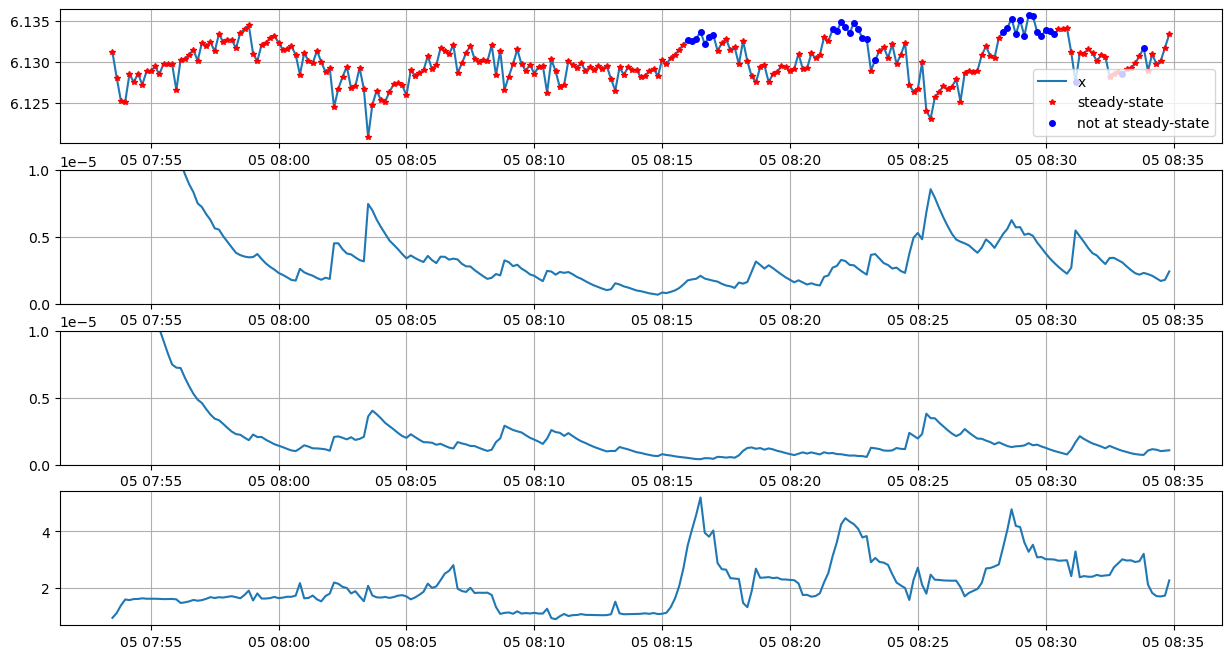

In [44]:
data = pd.read_csv('Igor2.csv', index_col=1, parse_dates=True)
data_PT = data[['PV-FT-15']]

indexes_v3 = [i for i in range(2790, 3500,1)]
data_v3 = data_PT.iloc[indexes_v3]

l1 = 0.2
l2 = 0.1
l3 = 0.1

x_st = data_v3.iloc[:50, 0].mean()
xf_st = data_v3.iloc[:50, 0].mean()
vf_st= data_v3.iloc[:50, 0].var()
df_st = 2*data_v3.iloc[:50, 0].var()
r_list = []
vf_list = []
df_list = []
xf_list = []

for i in range(51, 300):
    xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
    vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
    df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
    r = ((2-l1)*vf)/df
    vf_list.append(vf)
    df_list.append(df)
    r_list.append(r)
    xf_list.append(xf)
    x_st = data_v3.iloc[i,0]
    xf_st = xf
    vf_st = vf
    df_st = df
    
rr = pd.DataFrame(data = r_list , index=data_v3.iloc[51:300].index, columns = ['R'])
vff = pd.DataFrame(data = vf_list , index=data_v3.iloc[51:300].index, columns = ['R'])
dff = pd.DataFrame(data = df_list , index=data_v3.iloc[51:300].index, columns = ['R'])
xff = pd.DataFrame(data = xf_list , index=data_v3.iloc[51:300].index, columns = ['R'])

rr['stationary'] = np.where(rr['R']>3, 0, 1)

data_graph = pd.concat([data_v3, rr], axis=1)

plt.figure(figsize=(15,8))
plt.subplot(4, 1, 1)
plt.plot(data_graph.iloc[51:300].index, data_graph.iloc[51:300, 0], label='x')
plt.plot(data_graph[data_graph['stationary']==1].index, data_graph[data_graph['stationary']==1]['PV-FT-15'], 'r*', markersize=4, label='steady-state')
plt.plot(data_graph[data_graph['stationary']==0].index, data_graph[data_graph['stationary']==0]['PV-FT-15'], 'bo',  markersize=4, label='not at steady-state')

plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(vff.index,((2-l1)/2)*vff)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(dff.index,dff/2)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(rr.index,rr['R'])
plt.grid(True)

plt.show()

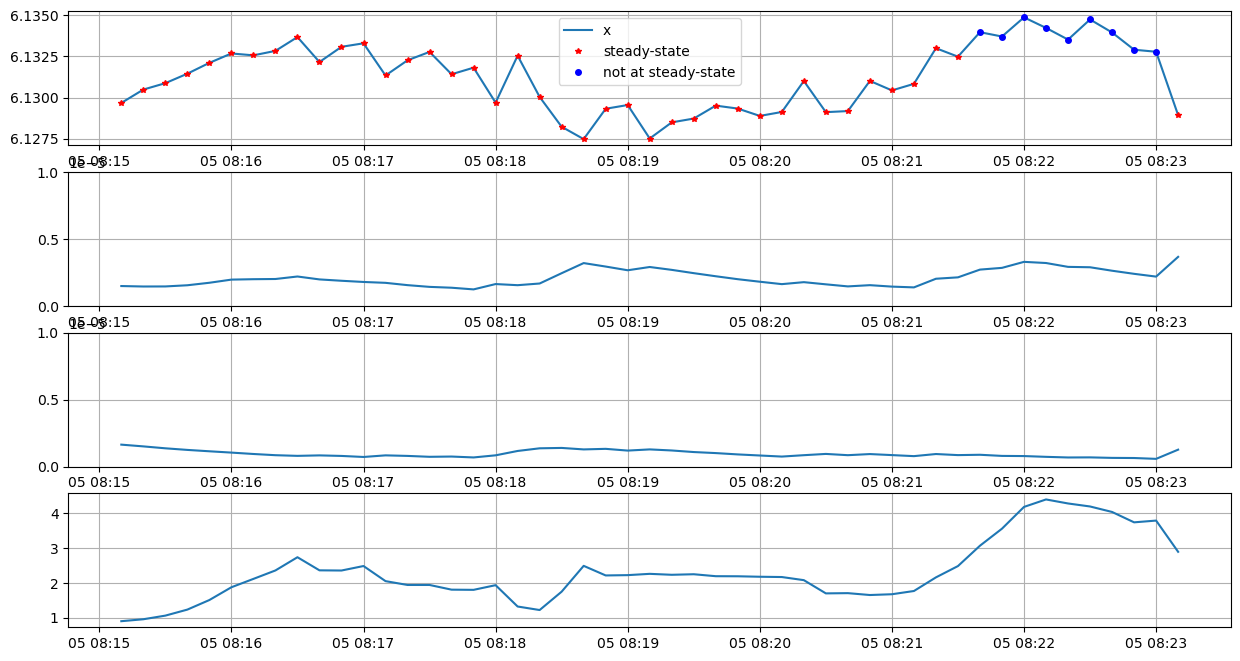

In [81]:
data = pd.read_csv('Igor2.csv', index_col=1, parse_dates=True)
data_PT = data[['PV-FT-15']]

indexes_v3 = [i for i in range(2920, 3500,1)]
data_v3 = data_PT.iloc[indexes_v3]

l1 = 0.2
l2 = 0.1
l3 = 0.1

x_st = data_v3.iloc[:50, 0].mean()
xf_st = data_v3.iloc[:50, 0].mean()
vf_st= data_v3.iloc[:50, 0].var()
df_st = 2*data_v3.iloc[:50, 0].var()
r_list = []
vf_list = []
df_list = []
xf_list = []

for i in range(51, 100):
    xf = l1*data_v3.iloc[i,0] + (1-l1)*xf_st
    vf = l2*(data_v3.iloc[i,0]-xf_st)**2 + (1-l2)*vf_st
    df = l3*(data_v3.iloc[i,0]-x_st)**2 + (1-l3)*df_st
    r = ((2-l1)*vf)/df
    vf_list.append(vf)
    df_list.append(df)
    r_list.append(r)
    xf_list.append(xf)
    x_st = data_v3.iloc[i,0]
    xf_st = xf
    vf_st = vf
    df_st = df
    
rr = pd.DataFrame(data = r_list , index=data_v3.iloc[51:100].index, columns = ['R'])
vff = pd.DataFrame(data = vf_list , index=data_v3.iloc[51:100].index, columns = ['R'])
dff = pd.DataFrame(data = df_list , index=data_v3.iloc[51:100].index, columns = ['R'])
xff = pd.DataFrame(data = xf_list , index=data_v3.iloc[51:100].index, columns = ['R'])

rr['stationary'] = np.where(rr['R']>3, 0, 1)
ee_list = []
for i in range(51, 100):
    ee = 1
    if i>709:
        ee = 0
    if i>764:
        ee = 1
    if i>780:
        ee = 0
    if i>839:
        ee = 1
    if i>1158:
        ee = 0
    if i>1209:
        ee = 1
    if i>1252:
        ee = 0
    if i>1335:
        ee = 1
        
    if i>1471:
        ee = 0
    if i>1477:
        ee = 1
    ee_list.append(ee)

rr['my'] = ee_list


data_graph = pd.concat([data_v3, rr], axis=1)

plt.figure(figsize=(15,8))
plt.subplot(4, 1, 1)
plt.plot(data_graph.iloc[51:100].index, data_graph.iloc[51:100, 0], label='x')
plt.plot(data_graph[data_graph['stationary']==1].index, data_graph[data_graph['stationary']==1]['PV-FT-15'], 'r*', markersize=4, label='steady-state')
plt.plot(data_graph[data_graph['stationary']==0].index, data_graph[data_graph['stationary']==0]['PV-FT-15'], 'bo',  markersize=4, label='not at steady-state')

plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(vff.index,((2-l1)/2)*vff)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(dff.index,dff/2)
plt.ylim(0, 0.00001)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(rr.index,rr['R'])
plt.grid(True)

plt.show()